In [13]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

%matplotlib notebooks

In [3]:
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])

In [18]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u, v in edges]
        labels = nx.get_edge_attributes(G, weight_name)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights)
    else:
        nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


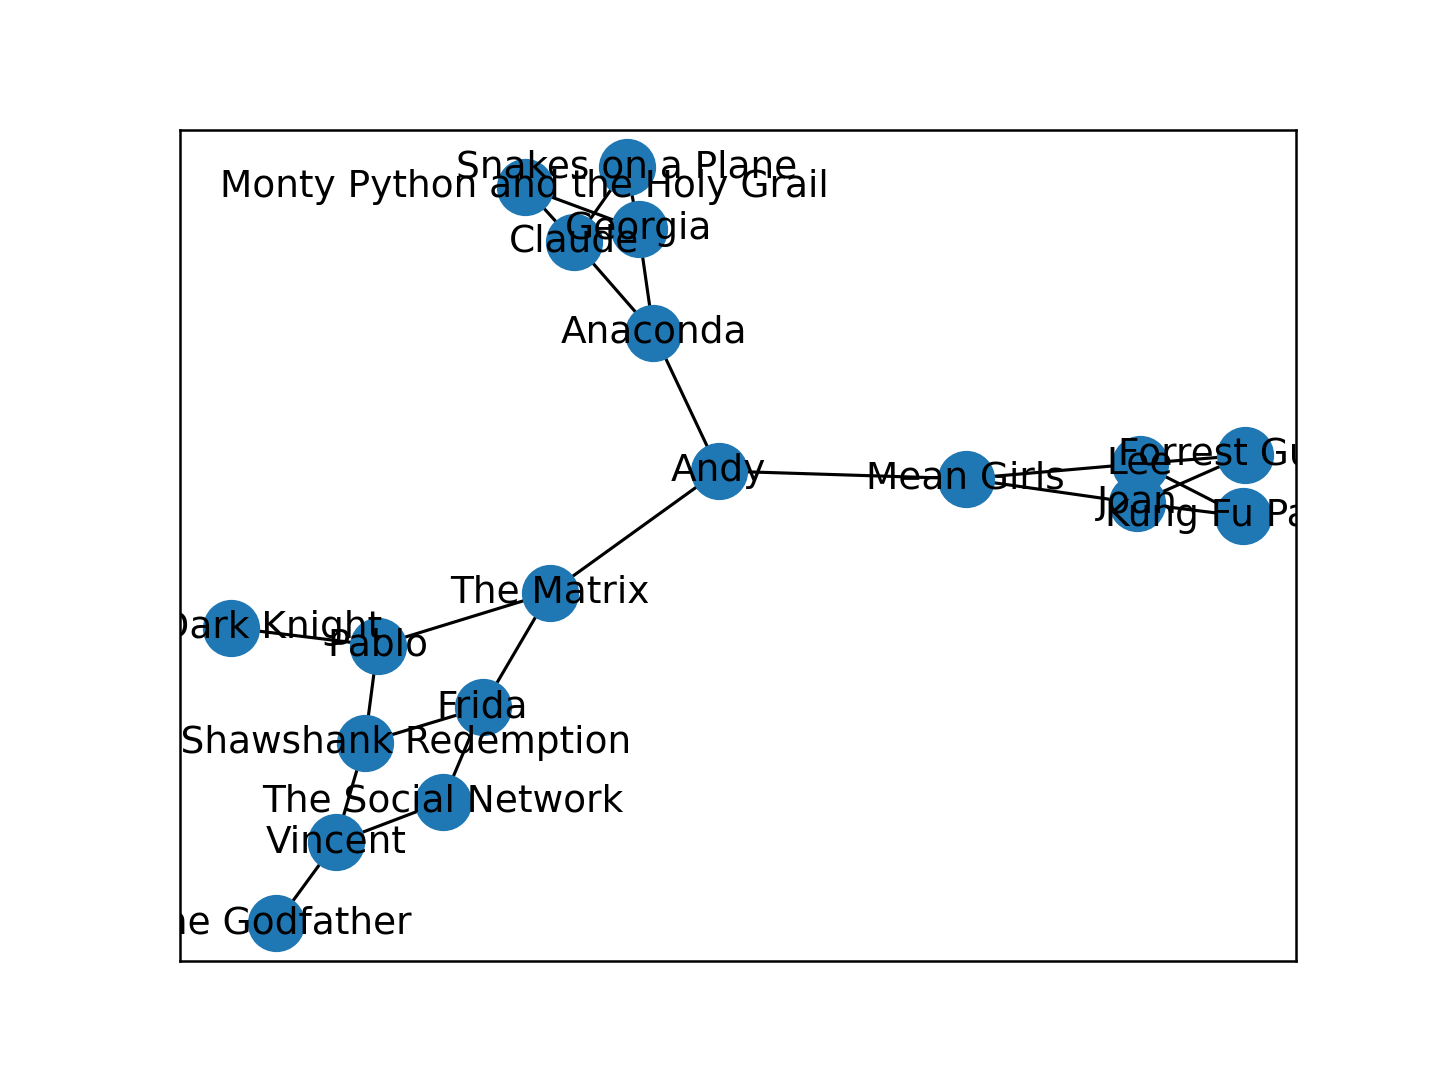

True

In [20]:
G_movies = nx.read_adjlist('Employee_Movie_Choices.txt', delimiter='\t')
_ = [G_movies.add_node(e, type='employee') for e in employees]
_ = [G_movies.add_node(m, type='movie') for m in movies]
plot_graph(G_movies)
bipartite.is_bipartite(G_movies)

<IPython.core.display.Javascript object>


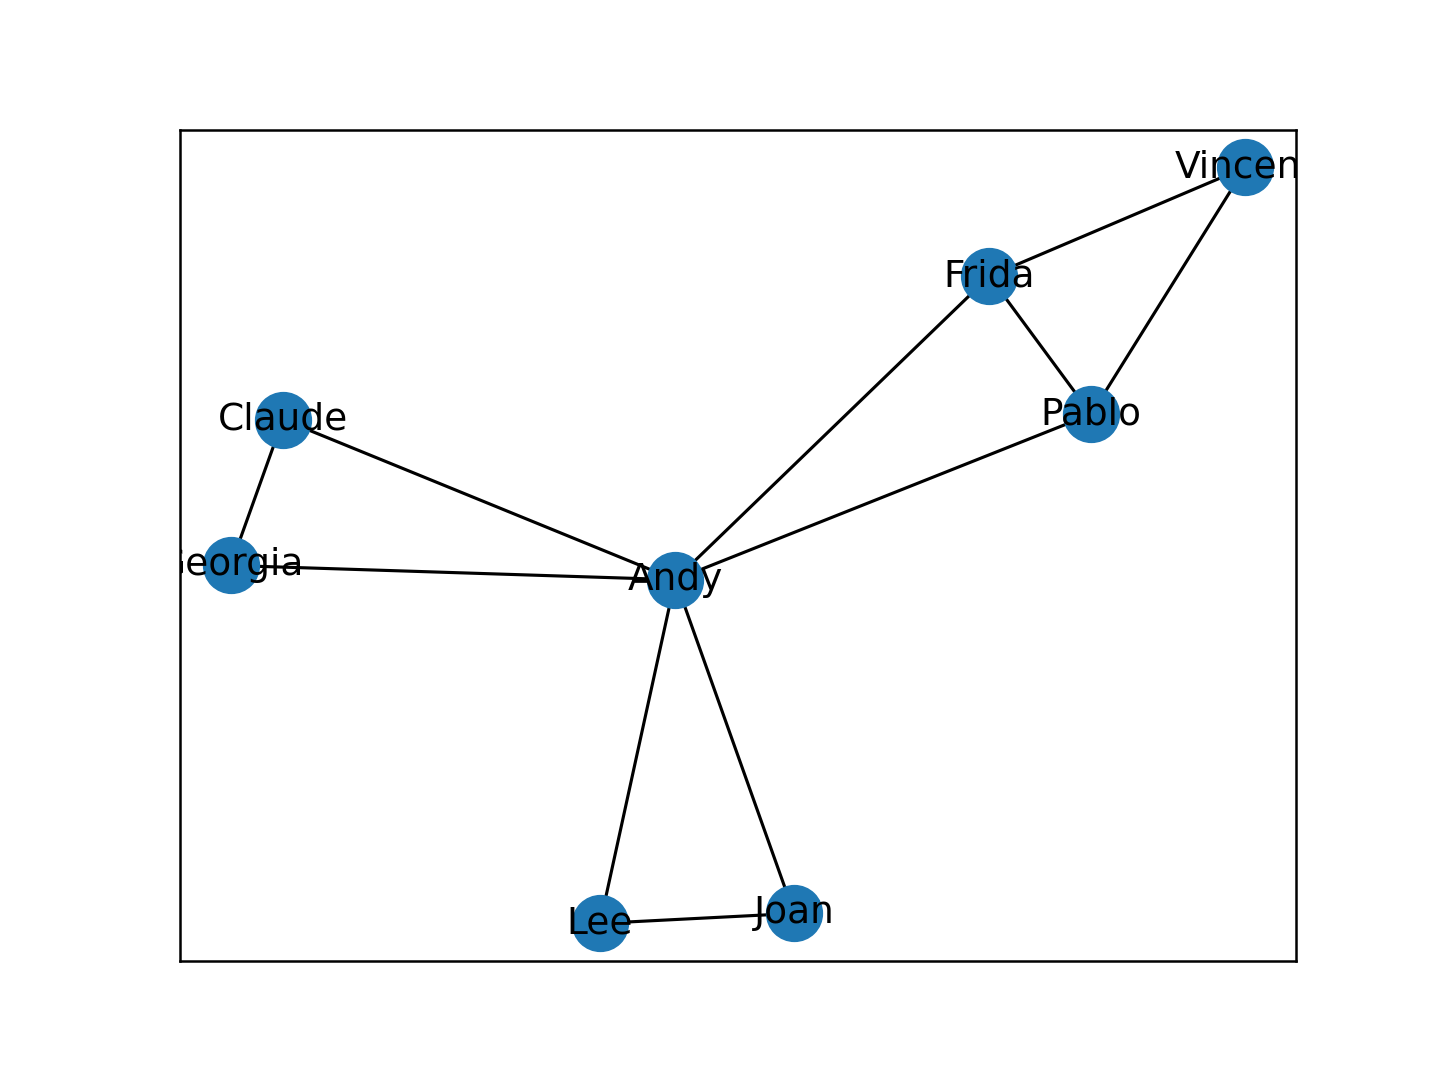

In [21]:
common_movies = bipartite.weighted_projected_graph(G_movies, set(employees))
plot_graph(common_movies)

In [27]:
G_relationship = nx.read_edgelist('Employee_Relationships.txt', data=[('weight', int)])
G_relationship.edges(data=True)

EdgeDataView([('Andy', 'Claude', {'weight': 0}), ('Andy', 'Frida', {'weight': 20}), ('Andy', 'Georgia', {'weight': -10}), ('Andy', 'Joan', {'weight': 30}), ('Andy', 'Lee', {'weight': -10}), ('Andy', 'Pablo', {'weight': -10}), ('Andy', 'Vincent', {'weight': 20}), ('Claude', 'Frida', {'weight': 0}), ('Claude', 'Georgia', {'weight': 90}), ('Claude', 'Joan', {'weight': 0}), ('Claude', 'Lee', {'weight': 0}), ('Claude', 'Pablo', {'weight': 10}), ('Claude', 'Vincent', {'weight': 0}), ('Frida', 'Georgia', {'weight': 0}), ('Frida', 'Joan', {'weight': 0}), ('Frida', 'Lee', {'weight': 0}), ('Frida', 'Pablo', {'weight': 50}), ('Frida', 'Vincent', {'weight': 60}), ('Georgia', 'Joan', {'weight': 0}), ('Georgia', 'Lee', {'weight': 10}), ('Georgia', 'Pablo', {'weight': 0}), ('Georgia', 'Vincent', {'weight': 0}), ('Joan', 'Lee', {'weight': 70}), ('Joan', 'Pablo', {'weight': 0}), ('Joan', 'Vincent', {'weight': 10}), ('Lee', 'Pablo', {'weight': 0}), ('Lee', 'Vincent', {'weight': 0}), ('Pablo', 'Vincent',

In [29]:
df_relationship = pd.read_csv('Employee_Relationships.txt', delimiter='\t', header=None, names=['e1', 'e2', 'rel_score'])
df_relationship.head()

,e1,e2,rel_score
0,Andy,Claude,0
1,Andy,Frida,20
2,Andy,Georgia,-10
3,Andy,Joan,30
4,Andy,Lee,-10


In [34]:
df_movies = pd.DataFrame(common_movies.edges(data=True), columns=['e1', 'e2', 'movie_score'])
df_movies['movie_score'] = df_movies['movie_score'].map(lambda x: x['weight'])
df_movies.head()

,e1,e2,movie_score
0,Vincent,Frida,2
1,Vincent,Pablo,1
2,Joan,Lee,3
3,Joan,Andy,1
4,Lee,Andy,1


In [35]:
df_movies_copy = df_movies.copy()
df_movies_copy.columns = ['e2', 'e1', 'movie_score']
df_movies = pd.concat([df_movies, df_movies_copy])

In [40]:
# Correlation between employee relationship scores and the number of movies they have in common
df_complete = df_relationship.merge(df_movies, how='left').fillna(0)
correlation = df_complete['rel_score'].corr(df_complete['movie_score'])
print(correlation)

0.7883962221733475
